In [2]:
from datetime import datetime, date
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open('../data/pickled_data/AFL259_all_data.pkl', 'rb') as f:
    df = pickle.load(f)

In [4]:
## Extreme dates for the continuous well data
## note, need to modify this, see below
min_date = datetime(2005,8,21)
max_date = datetime(2018,6,6)

In [5]:
df = df.loc[(df.date >= min_date) & (df.date <= max_date)].copy()

Text(0.5, 0, 'Date')

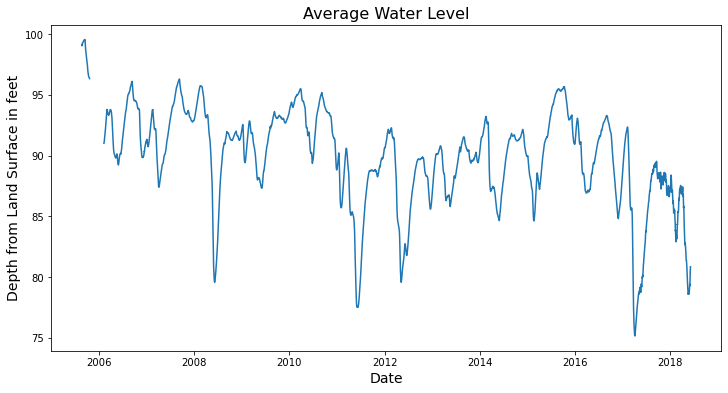

In [6]:
## The target variable
X = df.avg_well_depth.values
y = df.date.values

plt.figure(figsize=(12,6))
plt.title('Average Water Level', fontsize=16)
plt.plot(y,X, label = 'Water Level')
plt.ylabel('Depth from Land Surface in feet', fontsize=14)
plt.xlabel('Date', fontsize=14)

Text(0.5, 0, 'Date')

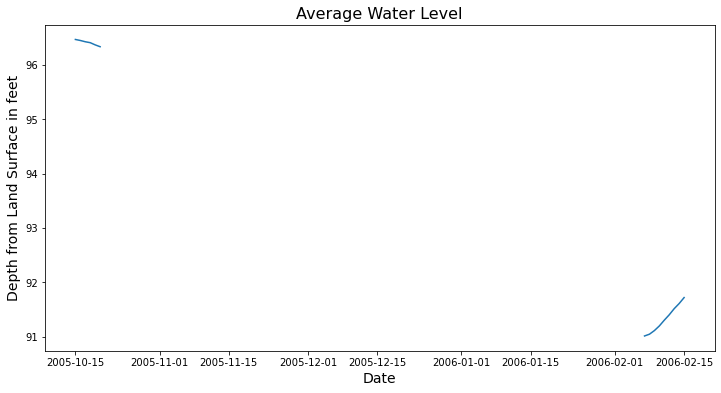

In [10]:
# zooming in to look at continuity
low_date = datetime(2005,10,15)
discon_date = datetime(2006,2,15)

zoomeddf = df.loc[(df.date >= low_date) & (df.date <= discon_date)].copy()

## The target variable
X = zoomeddf.avg_well_depth.values
y = zoomeddf.date.values

plt.figure(figsize=(12,6))
plt.title('Average Water Level', fontsize=16)
plt.plot(y,X, label = 'Water Level')
plt.ylabel('Depth from Land Surface in feet', fontsize=14)
plt.xlabel('Date', fontsize=14)

In [13]:
zoomeddf.tail(20)
# shows that the actual beginning of continuous data is feb 7, 2006
# fixing in the short pickle, the rest of the viz here is fine though
# just ignore the discontinuity at the beginning

,date,avg_well_depth,gage_ht,discharge_cfs,prcp,temp_avg,temp_max,temp_min,hPa_avg,hum_avg,hum_max,hum_min,wind_avg,wind_max,wind_min,gust_avg,gust_max,gust_min
38449,2006-01-27,NaN,22.19,11100.0,0.06,34.874483,38.59,31.73,1012.793103,88.344828,97.0,77.0,12.427586,16.11,6.93,0.000000,0.00,0.0
38450,2006-01-28,NaN,22.07,10700.0,0.11,36.539677,41.65,33.57,1005.483871,85.000000,97.0,71.0,19.655806,31.09,10.29,14.352581,40.26,0.0
38451,2006-01-29,NaN,21.85,10000.0,0.23,35.600000,40.57,32.65,1013.038462,88.769231,96.0,69.0,12.415385,20.80,6.93,1.995769,29.97,0.0
38452,2006-01-30,NaN,21.74,9670.0,0.05,44.660000,50.16,34.48,1003.708333,70.541667,87.0,60.0,22.947083,34.45,11.41,22.200833,45.63,0.0
38453,2006-01-31,NaN,21.66,9450.0,0.05,36.062258,40.15,32.07,1008.741935,84.935484,96.0,60.0,14.727419,20.80,8.05,6.508710,27.74,0.0
38454,2006-02-01,NaN,21.64,9390.0,0.00,41.206923,47.70,38.17,1003.730769,76.576923,93.0,52.0,21.147308,31.99,8.05,17.095385,36.46,0.0
38455,2006-02-02,NaN,21.63,9330.0,0.26,40.198462,46.31,35.37,1010.692308,84.153846,98.0,65.0,13.430385,19.69,6.93,0.757308,19.69,0.0
38456,2006-02-03,NaN,21.61,9290.0,0.00,41.475833,48.18,35.55,1016.416667,82.333333,100.0,63.0,10.670833,14.99,6.93,0.000000,0.00,0.0
38457,2006-02-04,NaN,21.62,9320.0,0.05,43.098333,47.70,36.61,1006.958333,69.916667,86.0,54.0,23.954167,33.33,11.41,23.870000,43.62,0.0
38458,2006-02-05,NaN,21.66,9440.0,0.00,36.122083,42.96,29.95,1025.333333,71.666667,88.0,54.0,13.589167,21.92,4.70,2.246250,28.63,0.0


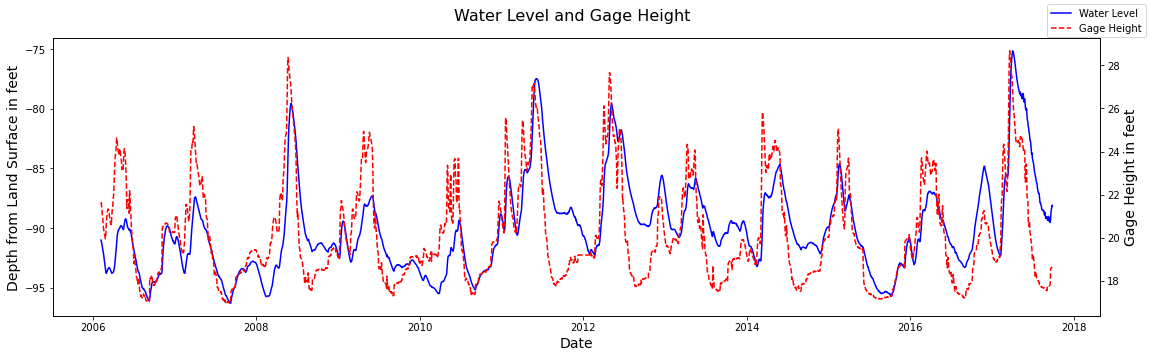

In [8]:
y = df.date.values
X = df.avg_well_depth.values*-1
X1 = df.gage_ht.values

fig, ax1 = plt.subplots(figsize=(16, 5))
plt.suptitle('Water Level and Gage Height', fontsize=16)

ax1 = plt.subplot()
plt.plot(y, X, 'b-', label = 'Water Level')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Depth from Land Surface in feet', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(y,X1, 'r--', label = 'Gage Height')
plt.ylabel('Gage Height in feet', fontsize=14)

fig.legend()

fig.tight_layout()
plt.show()

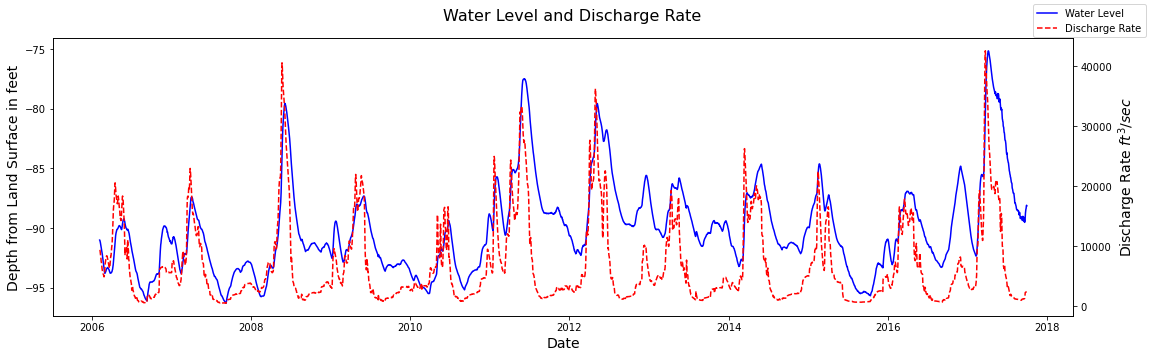

In [9]:
y = df.date.values
X = df.avg_well_depth.values*-1
X1 = df.discharge_cfs.values

fig, ax1 = plt.subplots(figsize=(16, 5))
plt.suptitle('Water Level and Discharge Rate', fontsize=16)

ax1 = plt.subplot()
plt.plot(y, X, 'b-', label = 'Water Level')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Depth from Land Surface in feet', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(y,X1, 'r--', label = 'Discharge Rate')
plt.ylabel('Discharge Rate ${ft}^3/sec$', fontsize=14)

fig.legend()

fig.tight_layout()
plt.show()

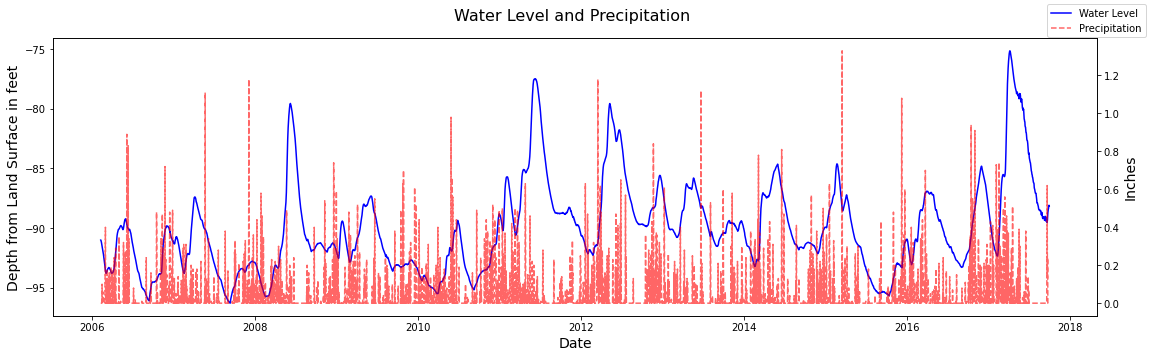

In [10]:
y = df.date.values
X = df.avg_well_depth.values*-1
X1 = df.prcp.values

fig, ax1 = plt.subplots(figsize=(16, 5))
plt.suptitle('Water Level and Precipitation', fontsize=16)

ax1 = plt.subplot()
plt.plot(y, X, 'b-', label = 'Water Level')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Depth from Land Surface in feet', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(y,X1, 'r--', alpha=0.6, label = 'Precipitation')
plt.ylabel('Inches', fontsize=14)

fig.legend()

fig.tight_layout()
plt.show()

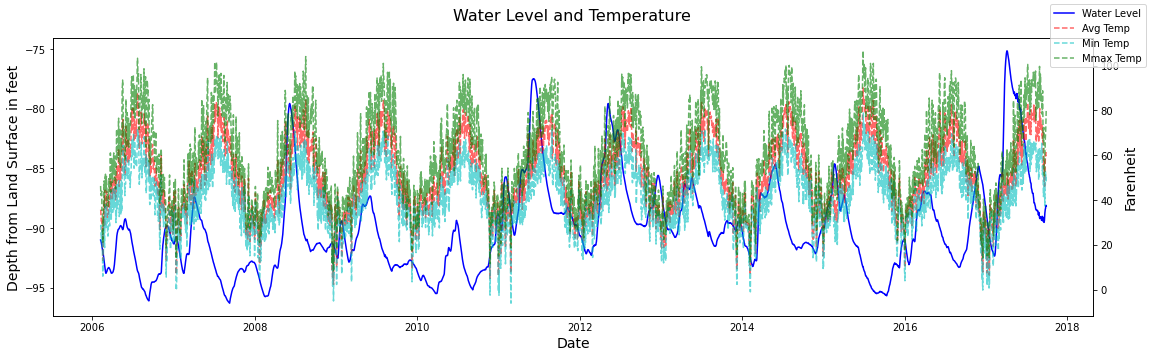

In [11]:
y = df.date.values
X = df.avg_well_depth.values*-1
X1 = df.temp_avg.values
X2 = df.temp_min.values
X3 = df.temp_max.values

fig, ax1 = plt.subplots(figsize=(16, 5))
plt.suptitle('Water Level and Temperature', fontsize=16)

ax1 = plt.subplot()
plt.plot(y, X, 'b-', label = 'Water Level')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Depth from Land Surface in feet', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(y,X1, 'r--', alpha=0.6, label = 'Avg Temp')
ax2.plot(y,X2, 'c--', alpha=0.6, label = 'Min Temp')
ax2.plot(y,X3, 'g--', alpha=0.6, label = 'Mmax Temp')
plt.ylabel('Farenheit', fontsize=14)

fig.legend()

fig.tight_layout()
plt.show()

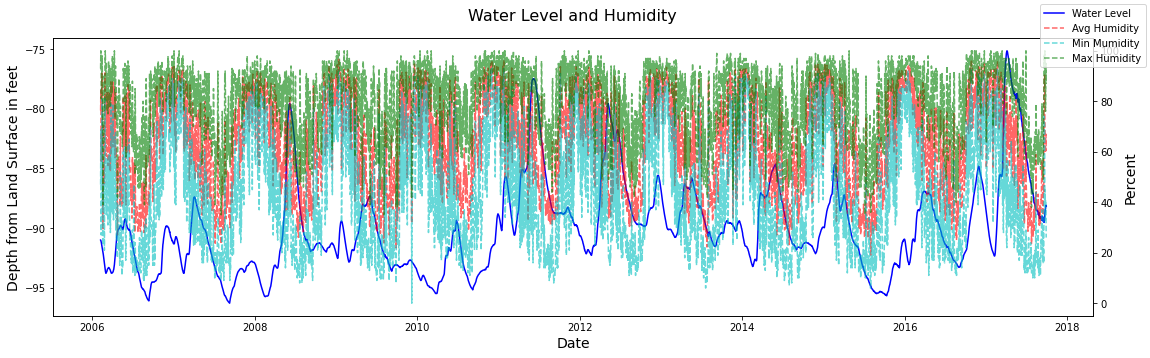

In [12]:
y = df.date.values
X = df.avg_well_depth.values*-1
X1 = df.hum_avg.values
X2 = df.hum_min.values
X3 = df.hum_max.values

fig, ax1 = plt.subplots(figsize=(16, 5))
plt.suptitle('Water Level and Humidity', fontsize=16)

ax1 = plt.subplot()
plt.plot(y, X, 'b-', label = 'Water Level')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Depth from Land Surface in feet', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(y,X1, 'r--', alpha=0.6, label = 'Avg Humidity')
ax2.plot(y,X2, 'c--', alpha=0.6, label = 'Min Mumidity')
ax2.plot(y,X3, 'g--', alpha=0.6, label = 'Max Humidity')
plt.ylabel('Percent', fontsize=14)

fig.legend()

fig.tight_layout()
plt.show()

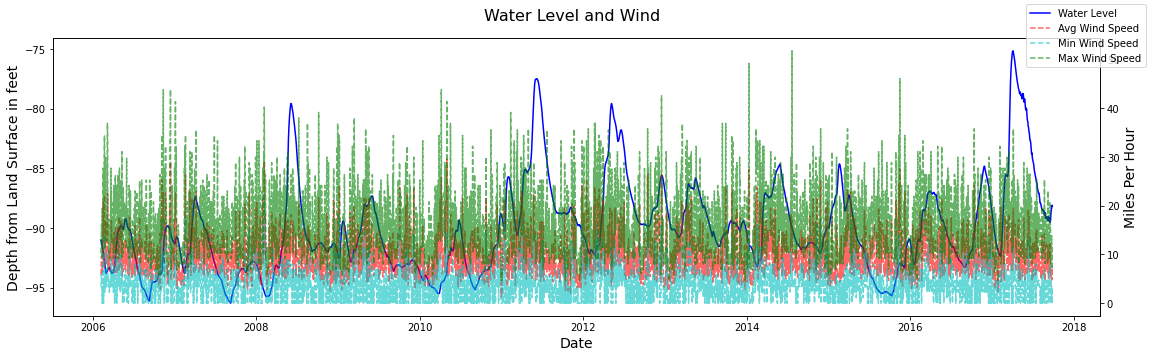

In [13]:
y = df.date.values
X = df.avg_well_depth.values*-1
X1 = df.wind_avg.values
X2 = df.wind_min.values
X3 = df.wind_max.values

fig, ax1 = plt.subplots(figsize=(16, 5))
plt.suptitle('Water Level and Wind', fontsize=16)

ax1 = plt.subplot()
plt.plot(y, X, 'b-', label = 'Water Level')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Depth from Land Surface in feet', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(y,X1, 'r--', alpha=0.6, label = 'Avg Wind Speed')
ax2.plot(y,X2, 'c--', alpha=0.6, label = 'Min Wind Speed')
ax2.plot(y,X3, 'g--', alpha=0.6, label = 'Max Wind Speed')
plt.ylabel('Miles Per Hour', fontsize=14)

fig.legend()

fig.tight_layout()
plt.show()

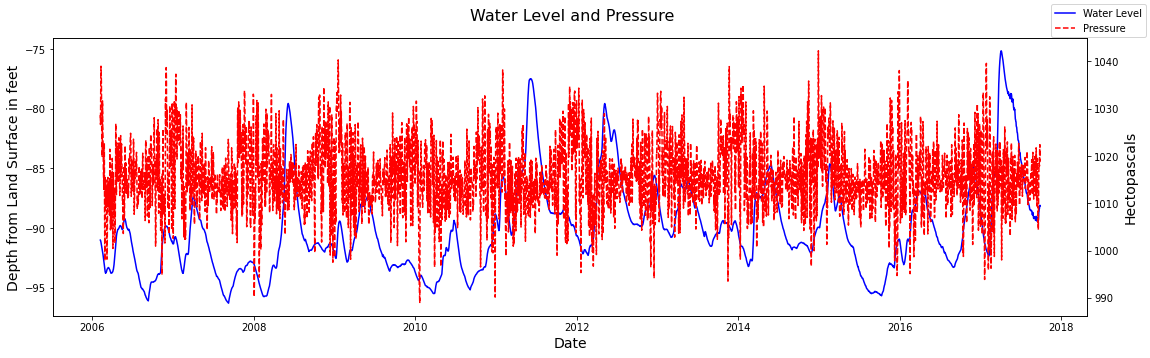

In [14]:
y = df.date.values
X = df.avg_well_depth.values*-1
X1 = df.hPa_avg.values


fig, ax1 = plt.subplots(figsize=(16, 5))
plt.suptitle('Water Level and Pressure', fontsize=16)

ax1 = plt.subplot()
plt.plot(y, X, 'b-', label = 'Water Level')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Depth from Land Surface in feet', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(y,X1, 'r--', label = 'Pressure')
plt.ylabel('Hectopascals', fontsize=14)

fig.legend()

fig.tight_layout()
plt.show()

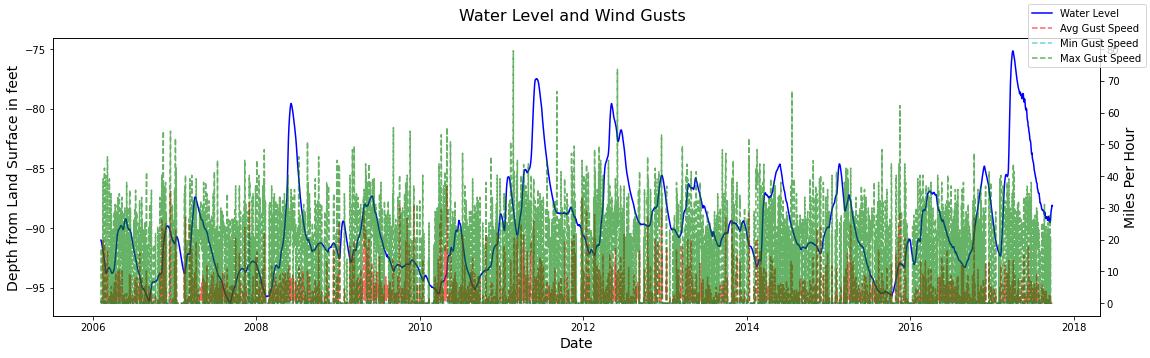

In [15]:
y = df.date.values
X = df.avg_well_depth.values*-1
X1 = df.gust_avg.values
X2 = df.gust_min.values
X3 = df.gust_max.values

fig, ax1 = plt.subplots(figsize=(16, 5))
plt.suptitle('Water Level and Wind Gusts', fontsize=16)

ax1 = plt.subplot()
plt.plot(y, X, 'b-', label = 'Water Level')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Depth from Land Surface in feet', fontsize=14)

ax2 = ax1.twinx()
ax2.plot(y,X1, 'r--', alpha=0.6, label = 'Avg Gust Speed')
ax2.plot(y,X2, 'c--', alpha=0.6, label = 'Min Gust Speed')
ax2.plot(y,X3, 'g--', alpha=0.6, label = 'Max Gust Speed')
plt.ylabel('Miles Per Hour', fontsize=14)

fig.legend()

fig.tight_layout()
plt.show()

In [14]:
df.columns

Index(['date', 'avg_well_depth', 'gage_ht', 'discharge_cfs', 'prcp',
       'temp_avg', 'temp_max', 'temp_min', 'hPa_avg', 'hum_avg', 'hum_max',
       'hum_min', 'wind_avg', 'wind_max', 'wind_min', 'gust_avg', 'gust_max',
       'gust_min'],
      dtype='object')